This notebook does 2 things:

1. Applies different resenet architectures and selects the
   model and architecture based on the validation loss.

1. Calculates AUC ROC score fo the best model.

In [2]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

from fastai2.metrics import RocAuc
from fastai2.vision.all import *

from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
dblock = DataBlock(get_x = lambda r: f"data/jpeg/train{r['image_name']}",
                  get_y = lambda r : r["target"],)

train_df = pd.read_csv('data/train.csv')

In [4]:
def strat_splitter():
    return train_test_split(train_df.target.values.tolist(),
                            test_size=0.33)

In [5]:
dblock = DataBlock((ImageBlock, MultiCategoryBlock),
                   splitter = TrainTestSplitter(),
                   get_x = lambda r: f"data/jpeg/train/{r['image_name']}.jpg",
                   get_y = lambda r : str(r["target"]),
                   item_tfms = Resize(size=224))


dls = dblock.dataloaders(train_df,bs=32, num_workers = 0)

In [18]:
%%time
output = dls.one_batch()
print(output[0].shape)

torch.Size([32, 3, 224, 224])
CPU times: user 6 s, sys: 528 ms, total: 6.53 s
Wall time: 9.51 s


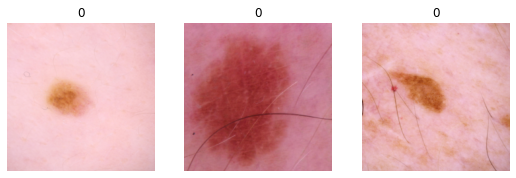

In [19]:
dls.show_batch(nrows=1, ncols=3)

In [77]:
learn = cnn_learner(dls, resnet18)

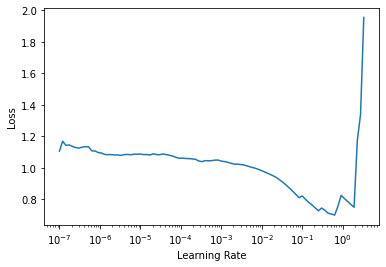

In [21]:
output = learn.lr_find(num_it=100)

In [22]:
print(output)

SuggestedLRs(lr_min=0.06309573650360108, lr_steep=0.0691830962896347)


In [26]:
dls_large = dblock.dataloaders(train_df,bs=128, num_workers = 0)

In [27]:
%%time 
_ = dls_large.one_batch()

CPU times: user 21.8 s, sys: 3.37 s, total: 25.1 s
Wall time: 26 s


In [31]:
learn = cnn_learner(dls_large, arch=resnet18)

In [ ]:
learn.fit_one_cycle(n_epoch=6, lr=3e-2,)

epoch,train_loss,valid_loss,time
0,0.663978,0.338901,1:45:12
1,0.136919,0.082410,1:40:58
2,0.087224,0.078590,1:44:18
3,0.079022,0.076558,1:45:59


In [ ]:
learn.save('fit-one-cycle-6-epochs')

In [ ]:
print('complete')

In [19]:
dls = dblock.dataloaders(train_df,bs=256)

learn = cnn_learner(dls, resnet18)

learn.load('fit-one-cycle-6-epochs')

In [20]:
learn.unfreeze()

In [ ]:
learn.lr_find()